## There is no denying that the climate is changing and, with the changing climate natural disasters become worse and cause more damage.  Climate change is directly correlated to environmental security, regional stability, maritime security, humanitarian issues, and overall global security.  Droughts, floods, hurricanes damage infrastructure, interrupt the supply chain, add to food instability, and adding to the deterioration of the natural habitats of thousands of species. This is storm data from NOAA. The first file is data from 2006 and will be used as my baseline for this analysis.  This analysis, spread over the course of five years, is meant to highlight the climate crisis and offer my perspective on consequences, new patterns, and possible solutions.  While I may not be an expert on climate or anything relating to the weather, I do understand the damage that can be caused if climate change is not taken as a serious threat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('StormEvents_details-database_v1.0_d2018_c20210604.csv')
df.head(1)

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_TITLE,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,DATA_SOURCE
0,201806,6,1810,201806,6,1810,125578,753161,NEBRASKA,31,2018,June,Hail,C,69,GARDEN,LBF,06-JUN-18 18:10:00,MST-7,06-JUN-18 18:10:00,0,0,0,0,0.00K,0.00K,Public,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,N,OSHKOSH,36.0,N,OSHKOSH,41.93,-102.21,41.93,-102.21,Severe storms impact portions of western and s...,Severe storms developed in the Nebraska Panhan...,Hail predominately penny size with some quarte...,99999999,9999,20180725,923,NaN,07/25/2018 09:23:59,NaN,NaN,CSV


# The first thing I notice right away is the most common start date is about a month earlier in 2018 than 2006 and the same with the end date.  

In [2]:
df['BEGIN_DATE_TIME'].describe()

count                  62693
unique                 33097
top       01-JUL-18 00:00:00
freq                     572
Name: BEGIN_DATE_TIME, dtype: object

In [3]:
begin_dates = df[df['BEGIN_DATE_TIME'] == '01-JUL-18 00:00:00']

## In 2018, more heat related storms and percipitation related storms show up in the most commom begin date, July 1st.  A new category, excessive heat is in the event types feature for the 2018 dataset that was not in the 2006 dataset.

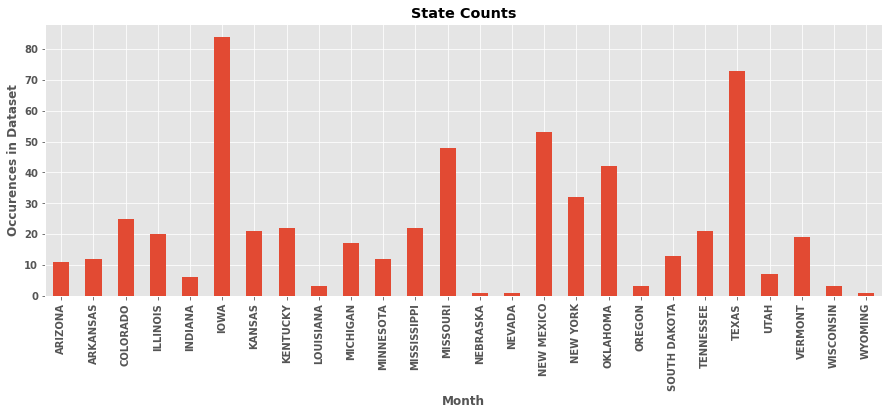

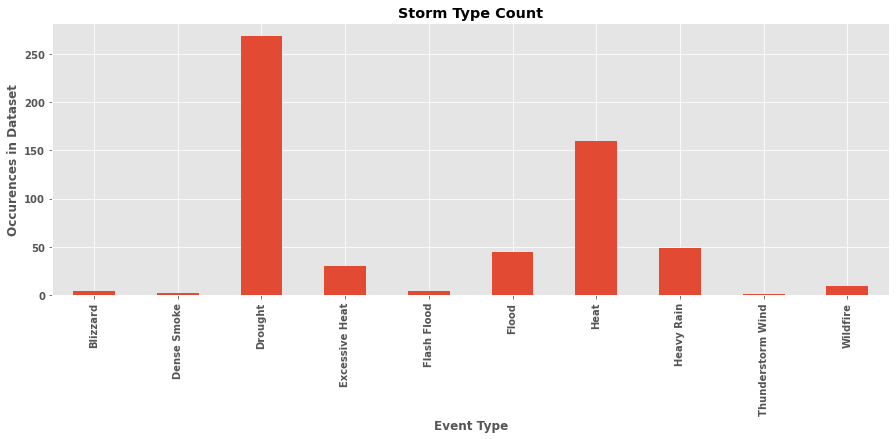

In [4]:
plt.figure(figsize=(15,5))
begin_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
begin_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [5]:
df['END_DATE_TIME'].describe()

count                  62693
unique                 32041
top       30-JUN-18 23:59:00
freq                     474
Name: END_DATE_TIME, dtype: object

In [6]:
end_dates = df[df['END_DATE_TIME'] == '30-JUN-18 23:59:00']

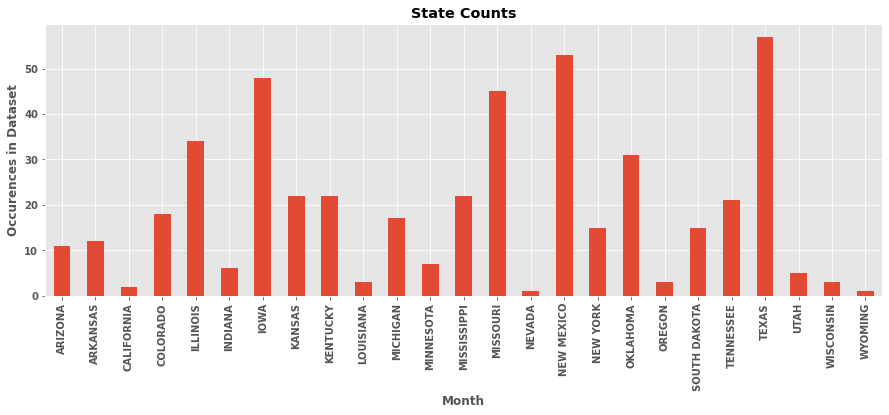

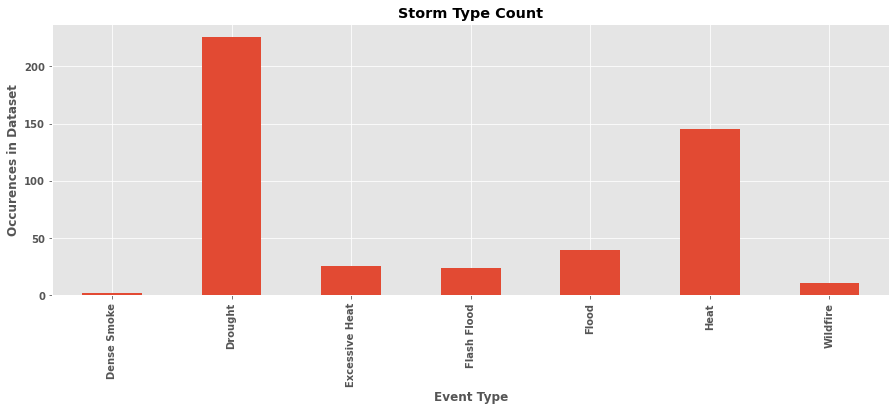

In [7]:
plt.figure(figsize=(15,5))
end_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
end_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,62693.0,62693.000000,62693.000000,62693.000000,62693.000000,62693.000000,28630.000000,67.000000,1254.000000,1254.000000,124.000000,38104.000000,38104.000000,38104.000000,38104.000000,38104.000000,38104.000000,6.269300e+04,62693.000000,6.269300e+04,62693.000000,21035.000000,2.103500e+04
mean,201806.059337,14.573477,1245.170482,201806.059337,15.992471,1436.234508,127241.908411,763468.575710,32.793613,2018.0,107.419042,0.026239,0.006396,0.011612,0.005040,37.522550,1.820896,2.512759,165.691388,86.500000,2.478139,2.512335,37.943919,-90.697960,37.940628,-90.691563,4.728221e+07,4273.931252,2.018290e+07,1294.309636,1.124079,2.018513e+07
std,3.034262,9.184832,683.442317,3.034262,9.189844,621.239608,3517.796456,20863.026894,18.773419,0.0,139.841167,1.302797,0.302704,0.398658,0.121561,23.580267,1.301810,3.228244,235.335741,94.314773,4.541202,4.568647,5.079055,12.216454,5.081846,12.212718,3.779818e+07,4130.347921,4.351169e+03,406.571341,0.329679,5.766143e+03
min,201801.000000,1.000000,0.000000,201801.000000,1.000000,0.000000,121257.000000,725884.000000,1.000000,2018.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,-14.345900,-170.821100,-14.437500,-170.905900,2.018010e+07,0.000000,2.018020e+07,2.000000,1.000000,2.018062e+07
25%,201804.000000,6.000000,700.000000,201804.000000,8.000000,1015.000000,124290.000000,746457.000000,19.000000,2018.0,25.000000,0.000000,0.000000,0.000000,0.000000,1.750000,1.000000,0.400000,50.000000,29.000000,1.000000,1.000000,34.879575,-97.510000,34.876325,-97.510000,2.018072e+07,1209.000000,2.018070e+07,1012.000000,1.000000,2.018082e+07
50%,201806.000000,15.000000,1415.000000,201806.000000,16.000000,1547.000000,127048.000000,762848.000000,31.000000,2018.0,64.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1.300000,75.000000,60.000000,1.000000,1.000000,38.316100,-89.970000,38.312300,-89.950000,2.018103e+07,1724.000000,2.018091e+07,1252.000000,1.000000,2.018112e+07
75%,201808.000000,22.000000,1800.000000,201808.000000,24.000000,1900.000000,130026.000000,779614.000000,46.000000,2018.0,119.000000,0.000000,0.000000,0.000000,0.000000,52.000000,3.000000,3.500000,200.000000,123.000000,3.000000,3.000000,41.420000,-81.230000,41.420000,-81.227900,1.000000e+08,9999.000000,2.018121e+07,1559.000000,1.000000,2.019052e+07
max,201812.000000,31.000000,2359.000000,201812.000000,31.000000,2359.000000,148990.000000,897943.000000,99.000000,2018.0,876.000000,185.000000,44.000000,86.000000,16.000000,137.000000,5.000000,29.150000,2175.000000,680.000000,168.000000,168.000000,62.563400,-64.786000,62.559800,-64.784000,1.000000e+08,9999.000000,2.020112e+07,2358.000000,2.000000,2.020122e+07


In [9]:
begin_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,572.0,572.0,572.0,572.0,572.000000,572.000000,572.000000,572.000000,572.000000,572.0,572.000000,572.000000,572.0,572.000000,572.000000,1.0,0.0,0.0,0.0,0.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.720000e+02,572.000000,5.720000e+02,572.000000,257.000000,2.570000e+02
mean,201807.0,1.0,0.0,201807.0,16.501748,1727.916084,128509.078671,771424.472028,30.674825,2018.0,113.952797,0.012238,0.0,0.008741,0.006993,85.0,NaN,NaN,NaN,NaN,2.696970,2.727273,42.447966,-94.423838,42.416543,-94.421855,5.492736e+07,5120.083916,2.018162e+07,1214.715035,1.171206,2.018314e+07
std,0.0,0.0,0.0,0.0,13.349341,713.959289,1033.796660,7887.294211,13.137127,0.0,148.538707,0.208885,0.0,0.172325,0.167248,NaN,NaN,NaN,NaN,NaN,2.327539,2.542770,0.871879,1.258452,0.858433,1.263530,3.960877e+07,4304.293588,3.023190e+03,438.296700,0.377424,4.738033e+03
min,201807.0,1.0,0.0,201807.0,1.000000,0.000000,125999.000000,755331.000000,4.000000,2018.0,1.000000,0.000000,0.0,0.000000,0.000000,85.0,NaN,NaN,NaN,NaN,0.000000,0.000000,40.886600,-96.640000,40.886600,-96.660000,2.018071e+07,315.000000,2.018082e+07,341.000000,1.000000,2.018112e+07
25%,201807.0,1.0,0.0,201807.0,5.000000,1000.000000,127825.000000,766548.750000,19.000000,2018.0,22.000000,0.000000,0.0,0.000000,0.000000,85.0,NaN,NaN,NaN,NaN,1.000000,1.000000,41.640000,-95.318000,41.635000,-95.333000,2.018091e+07,1303.000000,2.018093e+07,824.000000,1.000000,2.018112e+07
50%,201807.0,1.0,0.0,201807.0,10.000000,1900.000000,128444.000000,772485.500000,29.000000,2018.0,57.500000,0.000000,0.0,0.000000,0.000000,85.0,NaN,NaN,NaN,NaN,2.000000,2.000000,42.360000,-93.840000,42.360000,-93.840000,2.018121e+07,2136.000000,2.018100e+07,1140.000000,1.000000,2.018122e+07
75%,201807.0,1.0,0.0,201807.0,31.000000,2359.000000,129194.000000,774844.250000,40.000000,2018.0,124.250000,0.000000,0.0,0.000000,0.000000,85.0,NaN,NaN,NaN,NaN,4.000000,3.000000,43.054800,-93.610000,42.963250,-93.610000,1.000000e+08,9999.000000,2.018112e+07,1638.000000,1.000000,2.018122e+07
max,201807.0,1.0,0.0,201807.0,31.000000,2359.000000,130889.000000,831516.000000,56.000000,2018.0,540.000000,4.000000,0.0,4.000000,4.000000,85.0,NaN,NaN,NaN,NaN,11.000000,13.000000,44.400000,-91.173700,44.348000,-91.171900,1.000000e+08,9999.000000,2.020012e+07,2217.000000,2.000000,2.020022e+07


In [10]:
end_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,474.0,474.000000,474.000000,474.0,474.0,474.0,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,0.0,0.0,0.0,0.0,0.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,4.740000e+02,474.000000,4.740000e+02,474.000000,144.000000,1.440000e+02
mean,201806.0,15.892405,697.921941,201806.0,30.0,2359.0,127465.462025,765127.080169,29.635021,2018.0,123.875527,0.063291,0.004219,0.004219,0.006329,NaN,NaN,NaN,NaN,NaN,2.937500,3.046875,42.446089,-95.010200,42.407636,-95.010603,5.402820e+07,4862.177215,2.018115e+07,1341.624473,1.215278,2.018264e+07
std,0.0,13.446748,706.089951,0.0,0.0,0.0,1276.675916,6521.206950,12.993889,0.0,159.640026,0.973324,0.064888,0.064888,0.137795,NaN,NaN,NaN,NaN,NaN,2.166667,2.681090,1.090452,1.544249,1.076340,1.548788,3.948815e+07,4427.047031,1.616294e+03,404.445705,0.412450,5.107687e+03
min,201806.0,1.000000,0.000000,201806.0,30.0,2359.0,124830.000000,754224.000000,4.000000,2018.0,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,39.372000,-99.860500,39.341900,-99.815300,2.018070e+07,31.000000,2.018080e+07,228.000000,1.000000,2.018102e+07
25%,201806.0,1.000000,0.000000,201806.0,30.0,2359.0,126716.000000,759625.250000,19.000000,2018.0,22.250000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,41.739900,-95.932500,41.739525,-96.051250,2.018081e+07,1017.000000,2.018083e+07,1021.000000,1.000000,2.018112e+07
50%,201806.0,21.000000,772.500000,201806.0,30.0,2359.0,127578.000000,765684.500000,29.000000,2018.0,61.500000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.500000,2.500000,42.727150,-95.111850,42.700000,-95.169600,2.018083e+07,1701.000000,2.018083e+07,1441.000000,1.000000,2.018112e+07
75%,201806.0,29.000000,1100.000000,201806.0,30.0,2359.0,128049.000000,768672.750000,40.000000,2018.0,127.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,43.092500,-93.700000,43.087625,-93.704725,1.000000e+08,9999.000000,2.018093e+07,1655.500000,1.000000,2.018122e+07
max,201806.0,30.000000,2259.000000,201806.0,30.0,2359.0,130888.000000,783241.000000,56.000000,2018.0,540.000000,15.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,11.000000,13.000000,44.060000,-91.173700,43.960000,-91.171900,1.000000e+08,9999.000000,2.019122e+07,2325.000000,2.000000,2.020012e+07


## Analysis of whole dataframe

## The state count distribution in 2018 looks the similar to 2006 with some slight differences.  Deaths per storm seem to be more concentrated, ecspecially in Arizona, California, and Nevada with an outlier in Florida. 

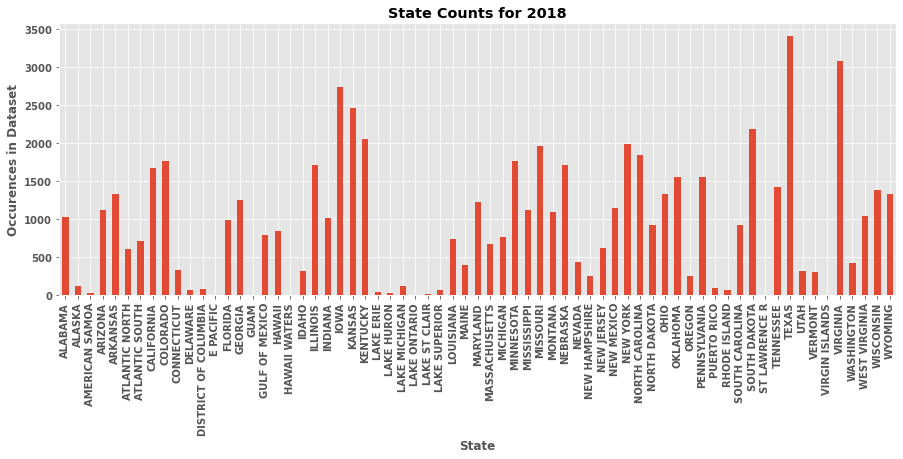

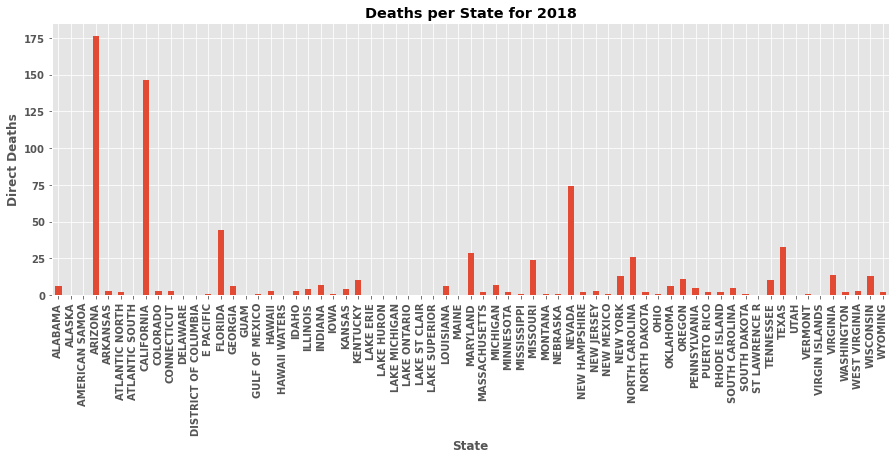

In [11]:
plt.figure(figsize=(15,5))
df.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts for 2018', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('STATE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per State for 2018', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## In 2018 June and July see the most storms which is similar to 2006. But in November there's a spike in deaths per storm that was not in 2006.

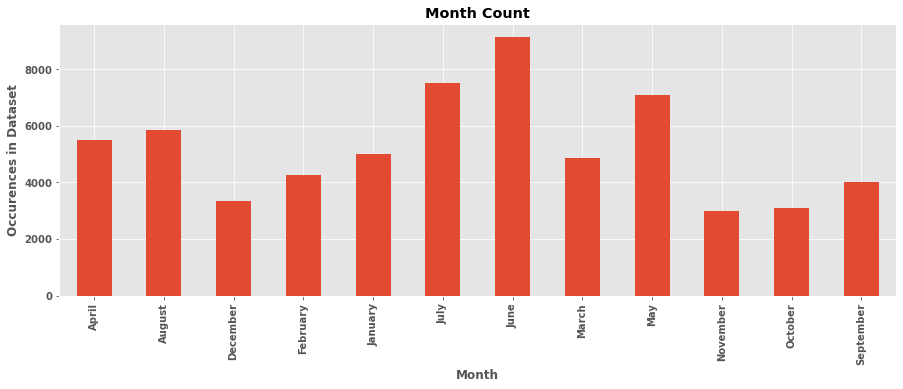

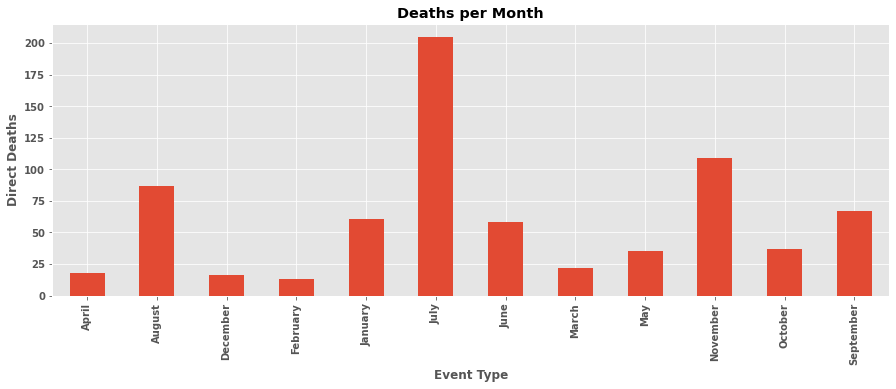

In [12]:
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['MONTH_NAME'].count().plot(kind='bar')
plt.title('Month Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Month', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Excessive heat doesn't even show up in the plot for 2006 and there is over 100 more deaths caused by wildfires in 2018 than 2006.  Flooding events have increased in 2018 while hail storms decreased and winter related storms have also increased.

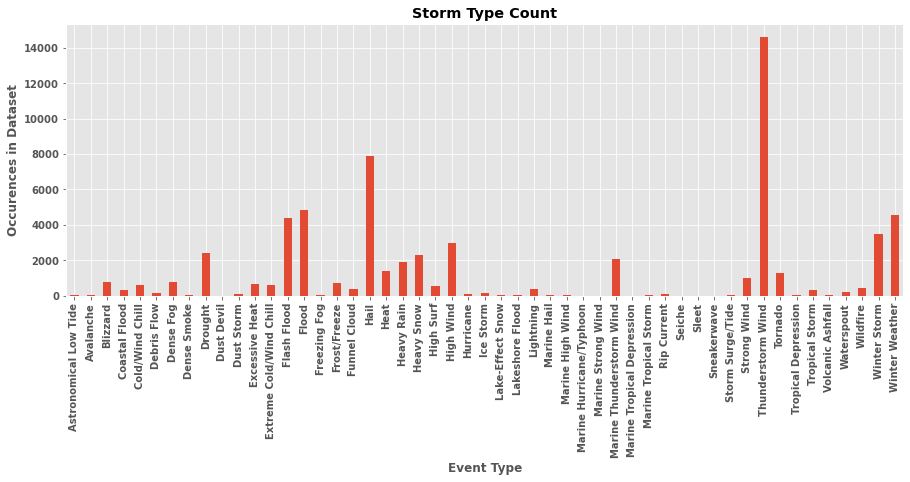

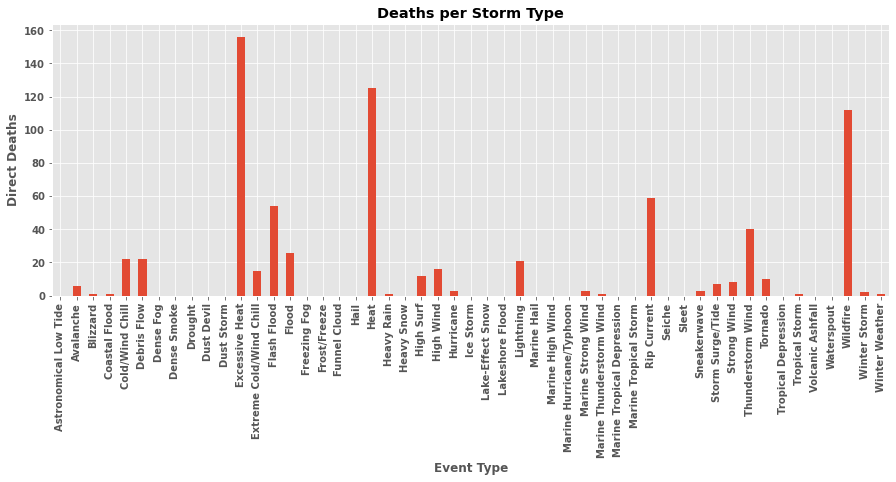

In [13]:
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Storm Type', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The range of storms seems to cluster around 10-15 miles and has an extreme of about 160 miles. The cluster is grouped tighter than in 2006 and there are less outliers in 2018 than in 2006.  Ido see that same linear pattern as 2006.

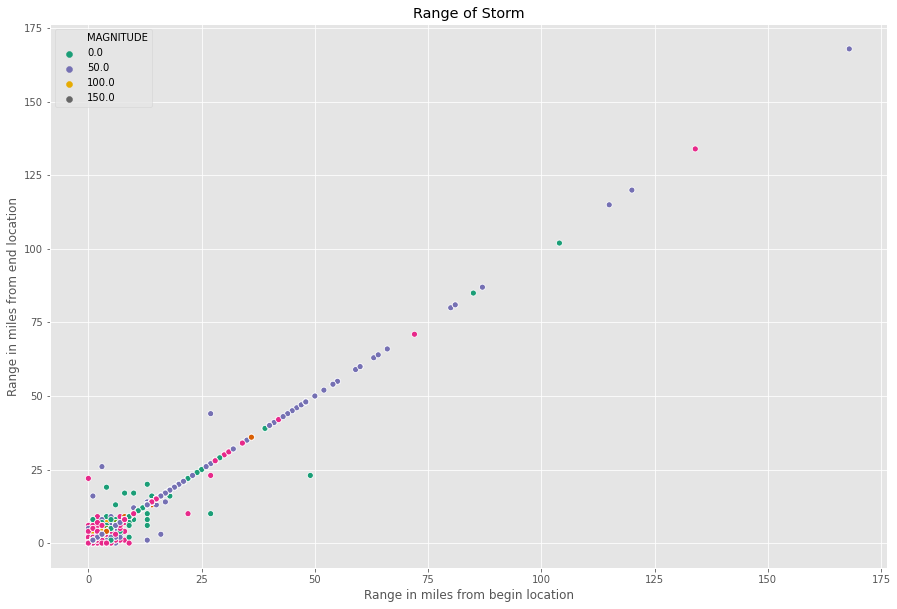

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot('BEGIN_RANGE', 'END_RANGE', hue='MAGNITUDE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Range in miles from end location')
plt.xlabel('Range in miles from begin location')
plt.show()

# EF0 – Light Damage (40 – 72 mph)
# EF1 – Moderate Damage (73 – 112 mph)
# EF2 – Significant damage (113 – 157 mph)
# EF3 – Severe Damage (158 – 206 mph)
# EF4 – Devastating Damage (207 – 260 mph)
# EF5 – Incredible Damage (261 – 318 mph)

## There's more varition in the size of a tornado in 2018 than 2006 and more tornados seem to have a higher intensity.

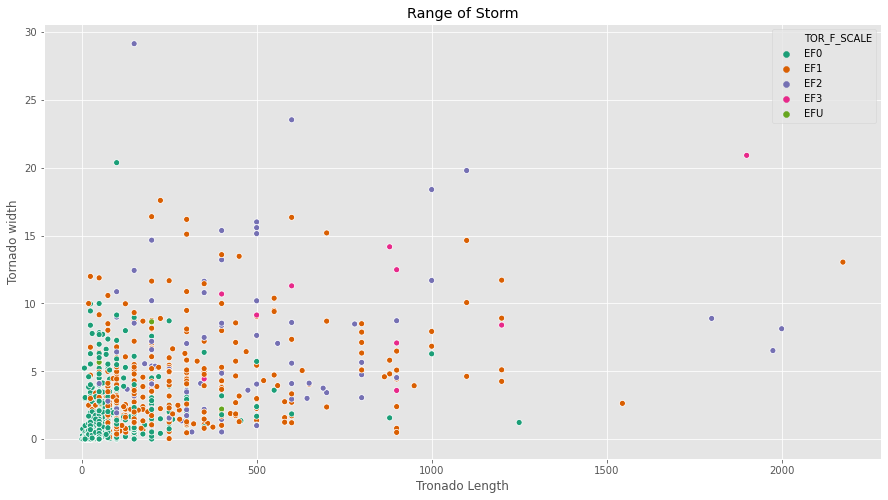

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot('TOR_WIDTH', 'TOR_LENGTH', hue='TOR_F_SCALE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Tornado width')
plt.xlabel('Tronado Length')
plt.show()

# EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind;
# MG = Measured Wind Gust

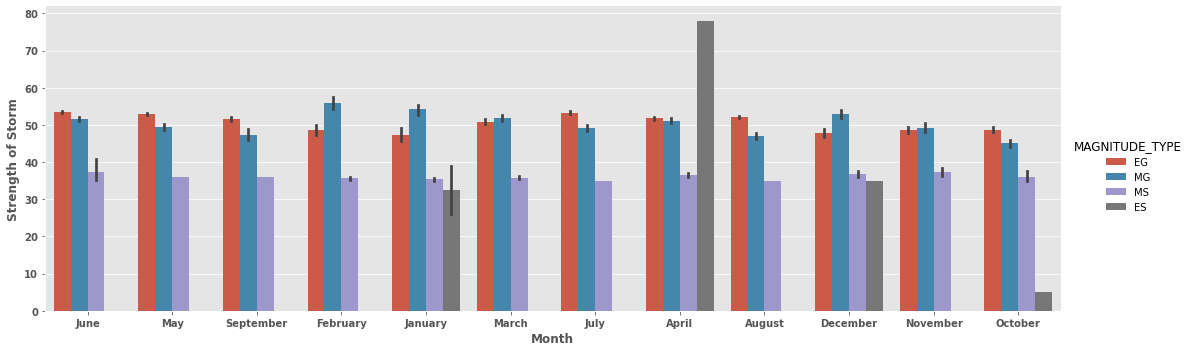

In [16]:
sns.catplot('MONTH_NAME', 'MAGNITUDE', hue='MAGNITUDE_TYPE', data=df,kind='bar', aspect=3)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

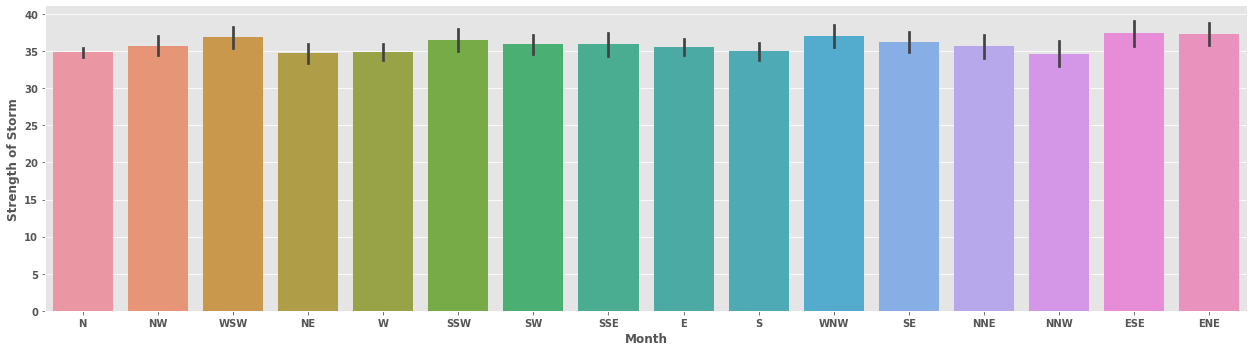

In [17]:
sns.catplot('BEGIN_AZIMUTH', 'MAGNITUDE', data=df,kind='bar', aspect=3.5)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

# Date and time analysis

In [18]:
df['BEGIN_DATE_TIME'] = pd.to_datetime(df['BEGIN_DATE_TIME'])
ts = df.set_index(df['BEGIN_DATE_TIME'])
ts['begin_hour'] = ts['BEGIN_DATE_TIME'].dt.hour
early_hours = ts[ts['begin_hour'] < 9]
late_hours = ts[ts['begin_hour'] > 17]

In [19]:
len(ts)

62693

## The magnitude of a storm was higher on average in 2018 than 2006 and there is less variance.  Higher values take up a larger portion of the data in 2018 even though in 2006 there's more data on magnitude.  The bulk of the data still comes from the summer months, which is hurricane season, but the data seems morse sparse in late April and Semptember than in 2006.

In [20]:
ts['MAGNITUDE'].describe()

count    28630.000000
mean        37.522550
std         23.580267
min          0.250000
25%          1.750000
50%         50.000000
75%         52.000000
max        137.000000
Name: MAGNITUDE, dtype: float64

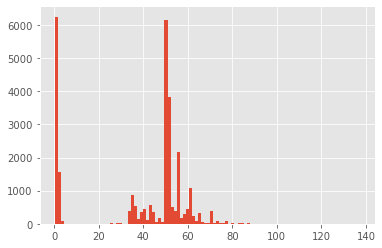

In [21]:
plt.hist(ts['MAGNITUDE'], bins=100)
plt.show()

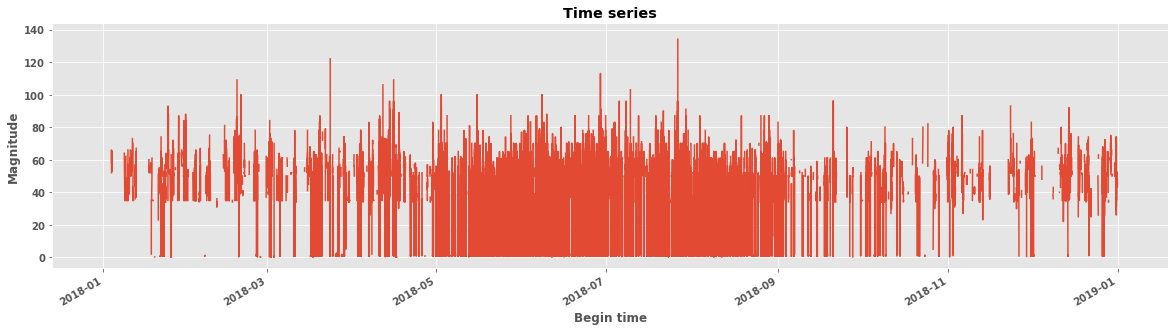

In [22]:
plt.figure(figsize=(20,5))
ts['MAGNITUDE'].plot()
plt.title('Time series', fontweight='bold')
plt.ylabel('Magnitude', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin time", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Storms do begin more in the earlier hours in 2018 than 2006 and then seem to follow a similar distribution as 2006.

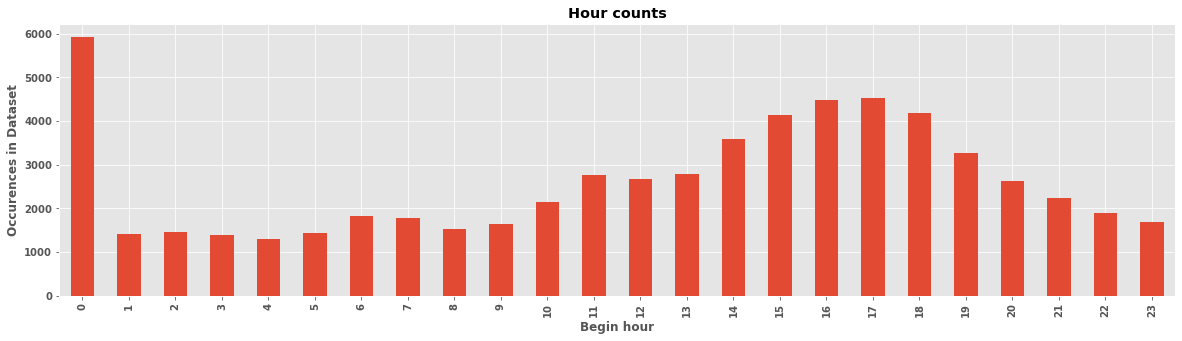

In [23]:
plt.figure(figsize=(20,5))
ts.groupby('begin_hour')['begin_hour'].count().plot(kind='bar')
plt.title('Hour counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin hour", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## In 2018, in the earlier hours, a new category shows up, astronomical low tide.  Thunderstorm wind, marine thunderstorm wind, high wind, and heavy rain have increased in 2018.  In the later hours the extreme weather have also increased in 2018 with more categories.

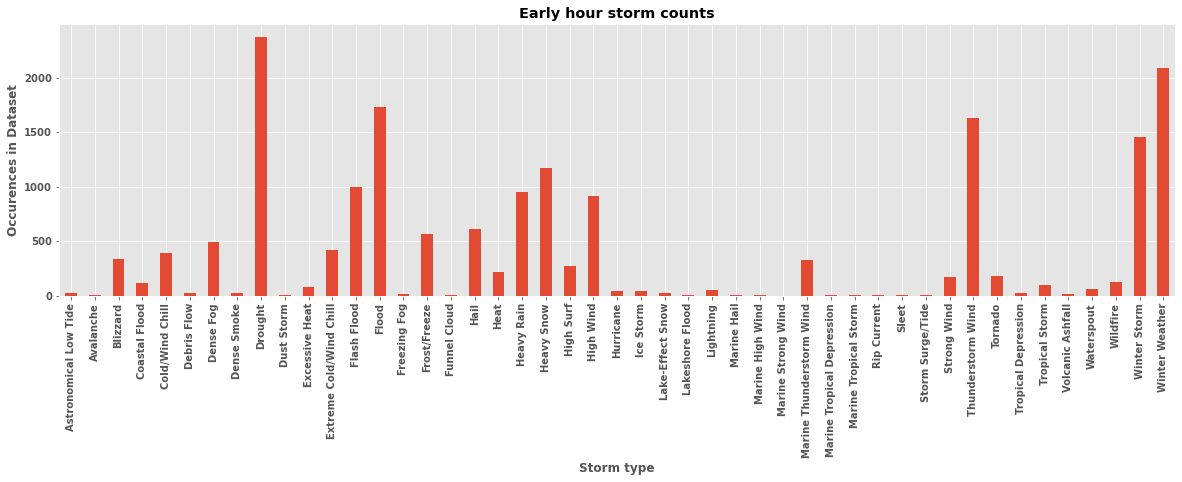

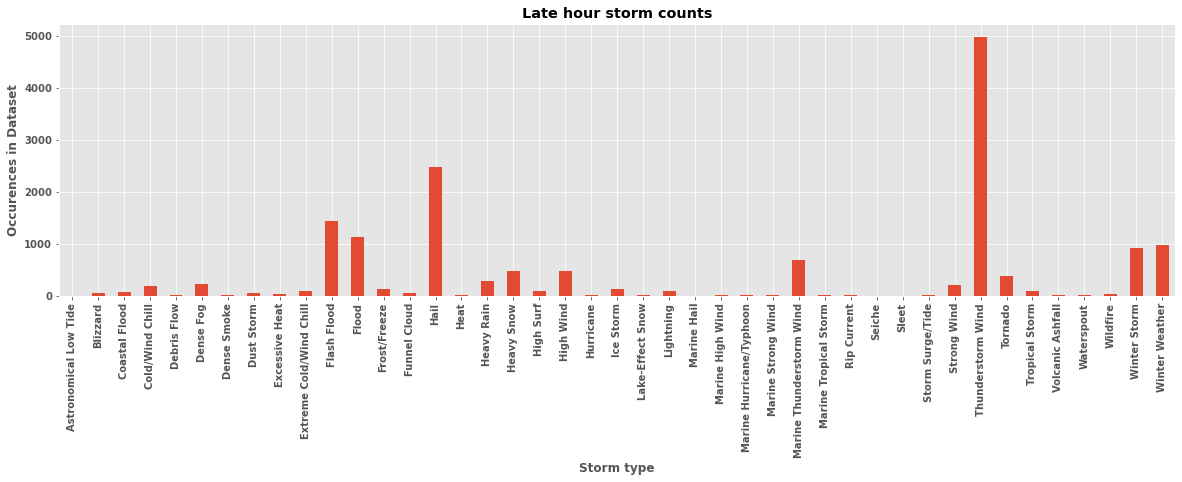

In [24]:
plt.figure(figsize=(20,5))
early_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Early hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(20,5))
late_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Late hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [25]:
df['EVENT_TYPE'].value_counts()

Thunderstorm Wind             14620
Hail                           7863
Flood                          4824
Winter Weather                 4570
Flash Flood                    4378
Winter Storm                   3468
High Wind                      2973
Drought                        2417
Heavy Snow                     2294
Marine Thunderstorm Wind       2090
Heavy Rain                     1924
Heat                           1374
Tornado                        1254
Strong Wind                    1025
Blizzard                        761
Dense Fog                       754
Frost/Freeze                    710
Excessive Heat                  668
Extreme Cold/Wind Chill         590
Cold/Wind Chill                 582
High Surf                       540
Wildfire                        417
Lightning                       396
Funnel Cloud                    349
Coastal Flood                   321
Tropical Storm                  317
Waterspout                      203
Ice Storm                   